In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [1]:
#If a node has more active promoters than opressers, it will be active.
def updateGraphNew(G):
    changeNodes = []
    for node in G.nodes:
        edgeSum = 0
        for link in G.in_edges(node,data=True):
            edgeSum += G.nodes[link[0]]["active"]*link[2]["weight"]
        if edgeSum > 0:
            changeNodes.append([node,1])
        else:
            changeNodes.append([node,0])
    for nodeActivity in changeNodes:
        G.nodes[nodeActivity[0]]["active"] = nodeActivity[1]

def ratioActive(G,N):
    numactive = 0
    for node in G.nodes:
        numactive += G.nodes[node]["active"]
    return (numactive/N)

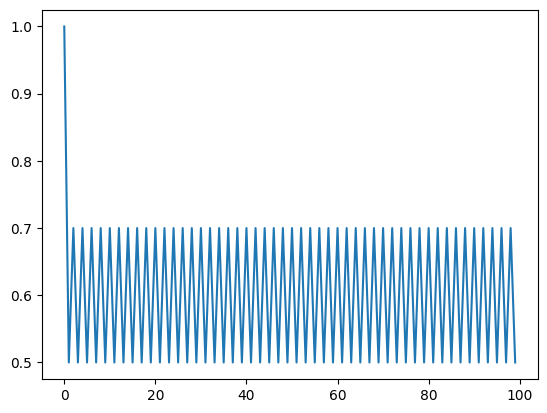

In [136]:
N = 10
c = 4
totalTime = 100

G = nx.fast_gnp_random_graph(N,c/N,directed=True)
nx.set_edge_attributes(G, {e: {'weight': np.random.choice([-1,1])} for e in G.edges})
nx.set_node_attributes(G,{n: {"active": 1} for n in G.nodes})
listR = []
listT = range(totalTime)
for t in range(totalTime):
    listR.append(ratioActive(G,N))  
    updateGraphNew(G)
plt.plot(listT,listR)

In [51]:
print(G.edges(data=True))

[(0, 1, {'weight': -1}), (0, 2, {'weight': 1}), (0, 3, {'weight': 1}), (0, 5, {'weight': 1}), (0, 6, {'weight': -1}), (0, 7, {'weight': 1}), (1, 4, {'weight': -1}), (1, 6, {'weight': -1}), (1, 7, {'weight': 1}), (1, 9, {'weight': -1}), (1, 0, {'weight': -1}), (2, 3, {'weight': 1}), (2, 5, {'weight': -1}), (2, 6, {'weight': 1}), (2, 8, {'weight': -1}), (2, 9, {'weight': 1}), (2, 1, {'weight': 1}), (3, 4, {'weight': 1}), (3, 5, {'weight': 1}), (3, 6, {'weight': -1}), (3, 7, {'weight': -1}), (3, 9, {'weight': 1}), (3, 1, {'weight': 1}), (3, 2, {'weight': -1}), (4, 5, {'weight': -1}), (4, 6, {'weight': -1}), (4, 7, {'weight': 1}), (4, 8, {'weight': 1}), (4, 1, {'weight': -1}), (4, 2, {'weight': -1}), (4, 3, {'weight': -1}), (5, 6, {'weight': -1}), (5, 7, {'weight': -1}), (5, 8, {'weight': 1}), (5, 9, {'weight': 1}), (5, 2, {'weight': 1}), (5, 3, {'weight': -1}), (5, 4, {'weight': 1}), (6, 8, {'weight': 1}), (6, 9, {'weight': -1}), (6, 0, {'weight': -1}), (6, 1, {'weight': 1}), (6, 3, {'wei